# In class Assignment3: Linear Regression, Support Vector Regression (SVR), Decision Tree Regression and Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv("heart.data.csv")

## Check out if there any missing value and any categorical column

In [3]:
dataset

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
489,70.194411,16.292803,4.707009
490,50.831908,6.026066,5.585493
491,68.884065,10.542996,3.109338
492,21.599230,7.604330,12.373691


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         491 non-null    float64
 1   smoking        490 non-null    float64
 2   heart.disease  493 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


In [5]:
dataset.isnull().sum()

biking           3
smoking          4
heart.disease    1
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['biking']=imputer.fit_transform(dataset[['biking']])

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['smoking']=imputer.fit_transform(dataset[['smoking']])

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['heart.disease']=imputer.fit_transform(dataset[['heart.disease']])

In [9]:
dataset.isnull().sum()

biking           0
smoking          0
heart.disease    0
dtype: int64

<AxesSubplot:xlabel='biking', ylabel='Count'>

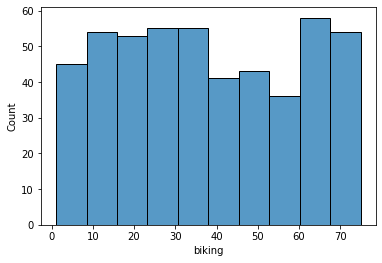

In [10]:
sns.histplot(dataset['biking'])

<AxesSubplot:xlabel='smoking', ylabel='Count'>

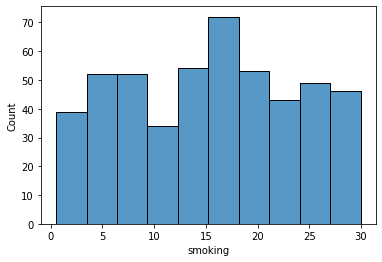

In [11]:
sns.histplot(dataset['smoking'])

<AxesSubplot:xlabel='heart.disease', ylabel='Count'>

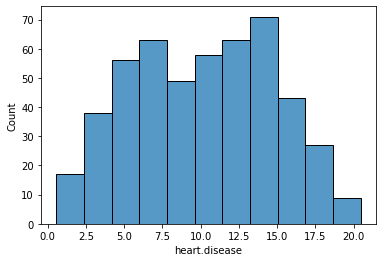

In [12]:
sns.histplot(dataset['heart.disease'])

## Create different copies of your dataset for using in Linear Regression, SVR, DT, RF

In [13]:
lr=dataset

In [14]:
lr.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


In [15]:
svr=dataset

In [16]:
dt=dataset

In [17]:
rf=dataset

## 1. Linear Regression

In [18]:
X=lr[['biking','smoking']]
y=lr[['heart.disease']]

In [19]:
X.head()

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


In [20]:
y.head()

,heart.disease
0,11.769423
1,2.854081
2,17.177803
3,6.816647
4,4.062224


## Splitting the dataset into the Training set and Test set¶

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=0)

## Training the Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
print("Coefficients",regressor.coef_)

Coefficients [[-0.20085296  0.17879109]]


In [24]:
print("intercept", regressor.intercept_)

intercept [14.9909448]


## Predicting the Test set results

In [25]:
y_pred=regressor.predict(X_test)

## validation dataset
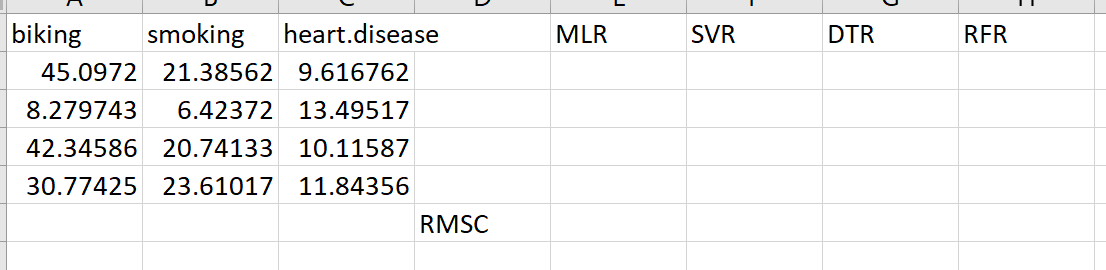!
Fill up the excel

In [26]:
#Case1
regressor.predict([[45.0972,21.38562]])

array([[9.75659682]])

In [27]:
#Case2
regressor.predict([[8.279743,6.42372]])

array([[14.47643777]])

In [28]:
#Case3
regressor.predict([[42.34586,20.74133]])

array([[10.19401831]])

In [29]:
#Case3
regressor.predict([[30.77425,23.61017]])

array([[13.03113349]])

## Evaluating the Model Performance using r2score and rmsc

In [30]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,y_pred))

r2_score 0.9720255707048382


In [31]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print("The Mean Squared Error is", rms)

The Mean Squared Error is 0.7435579865944336


# 2. Support Vector Regressor

## Selecting the copied dataset

In [32]:
svr

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
489,70.194411,16.292803,4.707009
490,50.831908,6.026066,5.585493
491,68.884065,10.542996,3.109338
492,21.599230,7.604330,12.373691


## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=0)

## Feature Scaling:- X_train and y_train
- X_train = sc_X.fit_transform(X_train)
- y_train = sc_y.fit_transform(y_train)

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X)
y_train=sc_y.fit_transform(y)

## Training the SVR model on the Training set

In [35]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting the Test set results

In [36]:
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))


## Validation dataset
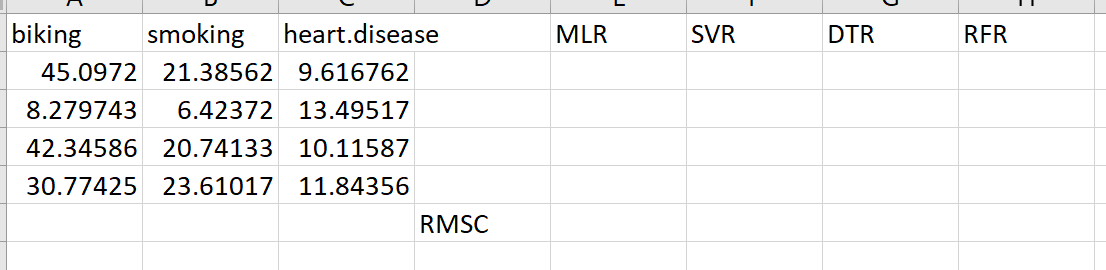
Fill up the excel

In [37]:
#Case1 check the sample
sc_y.inverse_transform(regressor.predict(sc_X.transform([[45.092, 21.385]])).reshape(-1,1))

array([[9.58535097]])

In [38]:
#Case2
sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.279743, 6.42372]])).reshape(-1,1))

array([[14.45192286]])

In [39]:
#Case3
sc_y.inverse_transform(regressor.predict(sc_X.transform([[42.34586, 20.74133]])).reshape(-1,1))

array([[10.00627117]])

In [40]:
#Case3
sc_y.inverse_transform(regressor.predict(sc_X.transform([[30.77425, 23.61017]])).reshape(-1,1))

array([[12.96627988]])

## Evaluating the Model Performance using r2score and rmsc

In [41]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,y_pred))

r2_score 0.971808770167479


In [42]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print("The Mean Square Error is", rms)

The Mean Square Error is 0.746433695752751


## 3. Decision Tree Regression

##  Selecting the copied dataset

In [43]:
dt

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
489,70.194411,16.292803,4.707009
490,50.831908,6.026066,5.585493
491,68.884065,10.542996,3.109338
492,21.599230,7.604330,12.373691


In [44]:
X=dt[['biking','smoking']]
y=dt[['heart.disease']]

In [45]:
X.head()

,biking,smoking
0,30.801246,10.896608
1,65.129215,2.219563
2,1.959665,17.588331
3,44.800196,2.802559
4,69.428454,15.974505


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree #tree diagram

## Splitting the dataset into the Training set and Test set

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=0)

## Training the Decision Tree Regression model on the Training set

In [48]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [49]:
y_pred=regressor.predict(X_test)

## Validation dataset
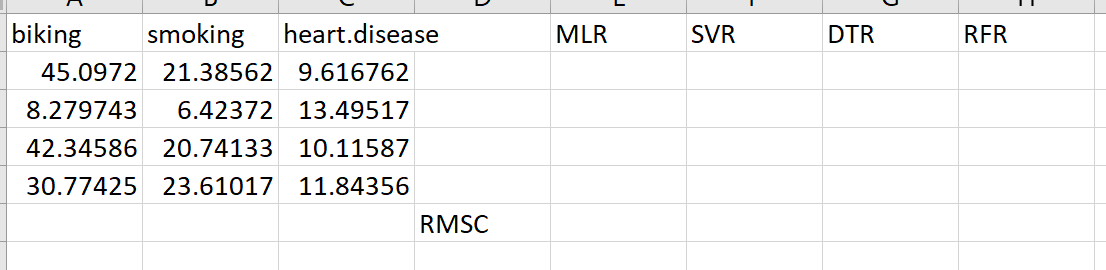
Fill up the excel

In [50]:
#Case1
regressor.predict([[45.0972,21.38562]])

array([9.79848336])

In [51]:
#Case2
regressor.predict([[8.279742,6.42372]])

array([14.44377369])

In [52]:
#Case3
regressor.predict([[42.34586,20.74133]])

array([9.79848336])

In [53]:
#Case3
regressor.predict([[30.77425,23.61017]])

array([12.99647582])

## Evaluating the Model Performance using r2score and rmsc

In [54]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,y_pred))

r2_score 1.0


In [55]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print("The Mean Square Error is", rms)

The Mean Square Error is 0.0


# 4. Random Forest Regression

## Selecting the copied dataset

In [56]:
rf

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
489,70.194411,16.292803,4.707009
490,50.831908,6.026066,5.585493
491,68.884065,10.542996,3.109338
492,21.599230,7.604330,12.373691


## Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=0)

## Training the Random Forest Regression model on the Training set

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X,y)

<ipython-input-58-c0179386adc8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

## Predicting the Test set results

In [68]:
y_pred=regressor.predict(X_test)

## Validation dataset
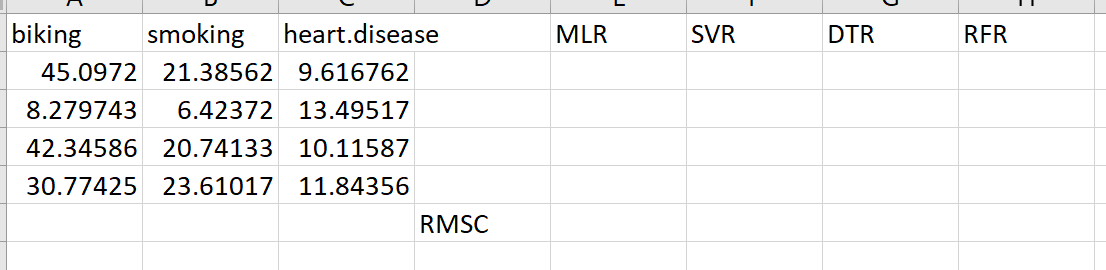

In [69]:
#Case1
regressor.predict([[45.0972,21.38562]])

array([9.31145191])

In [70]:
#Case2
regressor.predict([[8.279743,6.42372]])

array([14.28740131])

In [71]:
#Case3
regressor.predict([[42.34586,20.74133]])

array([9.5566818])

In [72]:
#Case4
regressor.predict([[30.77425,23.61017]])

array([13.05347471])

## Evaluating the Model Performance

In [73]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_pred,y_test))

r2_score 0.9942691850166891


In [74]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print("The Mean Square Error is", rms)

The Mean Square Error is 0.33440080792667576
